#### **[데이터마이닝] Assignment 2: REGRESSION & RANDOM FOREST**
**<font color='grey'> 2019 55718 | Melia Putri Handayani (멜리아 푸트리 한다야니)**

1. 라이브러리 'sklearn'과 'statsmodels'을 사용하여 회귀분석을 행하고 회귀 문제 [예측문제]에 적합한 성능지표를 사용하여 평가하시오.
> (Perform a regression analysis using libraries 'Sklearn' and 'statsmodels' and evaluate using
performance indicators suitable for the regression problem [predictive problem])

2. 랜덤포레스트 회귀를 실행하여 특성 중요도를 구하고 평가하시오.
> (Run a random forest regression to obtain and evaluate the characteristic importance)

###**Data Processing**

In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url="https://raw.githubusercontent.com/suyashtrivedi99/Concrete-Strength---Neural-Networks/master/concrete.csv"
df=pd.read_csv(url)
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


The concrete dataset contains 1,030 examples of concrete with eight features describing the components used in the mixture.

**PREDICTORS**
* `cement` (시멘트) : Component 1 - Cement ($kg$ in a $m^3$ mixture)
* `slag` (슬래그) : Component 2 - Blast Furnace Slag ($kg$ in a $m^3$ mixture)
* `ash` (재) : Component 3 - Fly Ash ($kg$ in a $m^3$ mixture)
* `water` (물) : Component 4 - Water ($kg$ in a $m^3$ mixture)
* `superplastic` (고성능 감수제) : Component 5 - Superplasticizer ($kg$ in a $m^3$ mixture)
* `coarseagg` (굵은 골재의양) : Component 6 - Coarse Aggregate ($kg$ in a $m^3$ mixture)
* `fineagg` (잔골재의 양) : Component 7 - Fine Aggregate ($kg$ in a $m^3$ mixture)
* `age` (숙성 시간) : Age ($day$)

**TARGET: The Final Comprehesive Strength (최종 내압강도)**
* `strength` (강도) : (MPa, megapascals)

*Source of Features Explanation:*
https://www.kaggle.com/c/ctc-34-concrete-compressive-strength-prediction/overview

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

###**1. REGRESSION**

라이브러리 'sklearn'과 'statsmodels'을 사용하여 회귀분석을 행하고 회귀 문제 [예측문제]에 적합한 성능지표를 사용하여 평가하시오.
> (Perform a regression analysis using libraries 'Sklearn' and 'statsmodels' and evaluate using
performance indicators suitable for the regression problem [predictive problem])

**The Basic Equation of Multiple Linear Regression is:**

$Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + ε$

####**Multiple Linear Regression with SK Learn**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
#Predictors variable
X=df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']]
#Target variable 'strength'
y=df['strength']

In [41]:
#Split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(515, 8)
(515, 8)
(515,)
(515,)


In [47]:
linearRegressor=LinearRegression()
linearRegressor.fit(X_train,y_train)
y_pred=linearRegressor.predict(X_test)

In [50]:
print(linearRegressor.intercept_)

-62.84429480633026


In [53]:
print(linearRegressor.coef_)

[ 0.12730159  0.10686056  0.09462156 -0.10653215  0.35896023  0.02941354
  0.04252387  0.11328258]


In [57]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

**So, from the results above, we can input the coefficient of each predictor to the eqation:**

$Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + ε$

$Strength = 0.12730159*Cement + 0.10686056*Slag + 0.09462156*Ash - 0.10653215*Water + 0.35896023*Superplastic + 0.02941354*Coarseagg + 0.04252387*Finagg + 0.11328258*Age$

In [59]:
import seaborn as sns

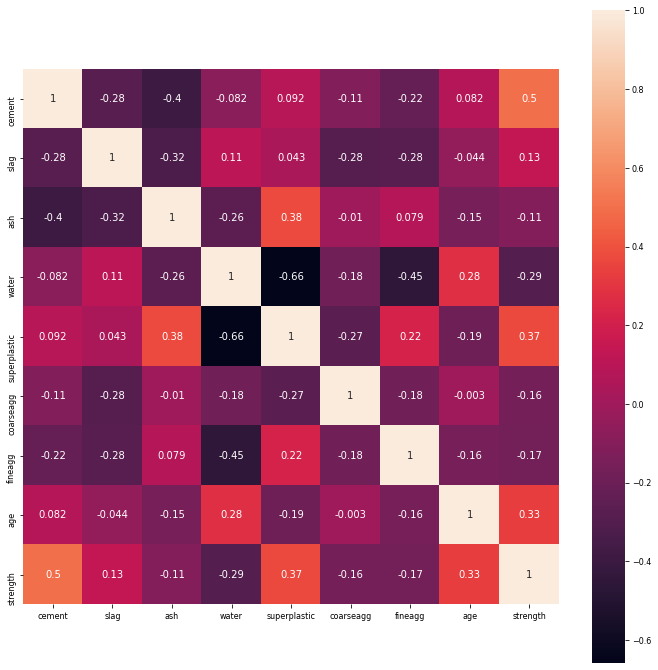

In [62]:
#Heatmap of Concrete Dataset
plt.figure(figsize=(12,12),facecolor='w')
sns.heatmap(df.corr(),square=True,annot=True,annot_kws={"size":10})

####**Regression with StatsModels**

In [42]:
#First, we need to import Statsmodels Module
import statsmodels.api as sm

In [43]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [45]:
#Then, perform the multiple linear regression with Statsmodels: Ordinary Least Square sm.OLS(endog)

ml_reg=sm.OLS(y,X)
result=ml_reg.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               strength   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1732.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        06:59:27   Log-Likelihood:                         -3869.4
No. Observations:                1030   AIC:                                      7755.
Df Residuals:                    1022   BIC:                                      7794.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#####**Alternatively, using statsmodels.formula.api**

In [26]:
from statsmodels.formula.api import ols

In [46]:
ml_reg=ols("strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age",df)
result=ml_reg.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          6.29e-206
Time:                        06:59:32   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -23.3312     26.586     -0.878   

####**Diagnostic Plots of the Regression Model**

In [29]:
from statsmodels.nonparametric.smoothers_lowess import lowess

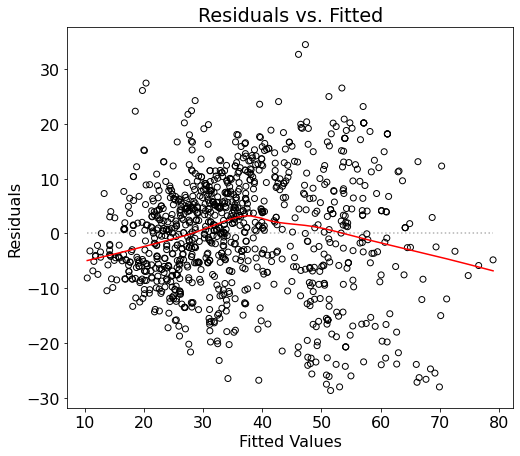

In [31]:
#Residuals Plots
residuals=result.resid
fitted=result.fittedvalues
smoothed=lowess(residuals,fitted)

plt.rcParams.update({'font.size':16})
plt.rcParams["figure.figsize"] =(8,7)
plt.rcParams['figure.facecolor']='white'
fig,ax=plt.subplots()
ax.scatter(fitted,residuals,edgecolors='k',facecolors ='none')
ax.plot(smoothed[:,0],smoothed[:,1],color ='r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color='k',linestyle=':',alpha=0.3)

plt.show()

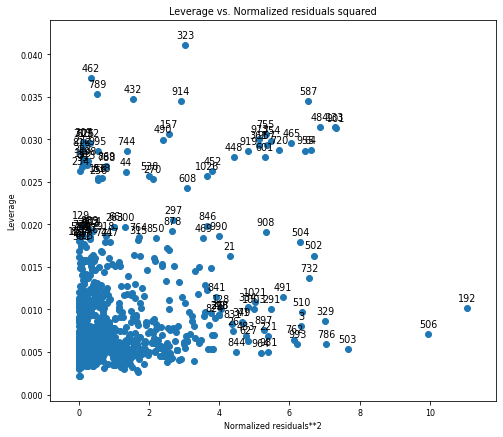

In [35]:
#Leverage Plots
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(result)
plt.rcParams.update({'font.size':8})
plt.rcParams["figure.figsize"] =(10,5)
plt.rcParams['figure.facecolor']='white'
plt.show()

###**2. RANDOM FOREST**

랜덤포레스트 회귀를 실행하여 특성 중요도를 구하고 평가하시오.
> (Run a random forest regression to obtain and evaluate the characteristic importance)

Feature: 0, Score: 0.32062
Feature: 1, Score: 0.08316
Feature: 2, Score: 0.01741
Feature: 3, Score: 0.10763
Feature: 4, Score: 0.07116
Feature: 5, Score: 0.02660
Feature: 6, Score: 0.03730
Feature: 7, Score: 0.33611


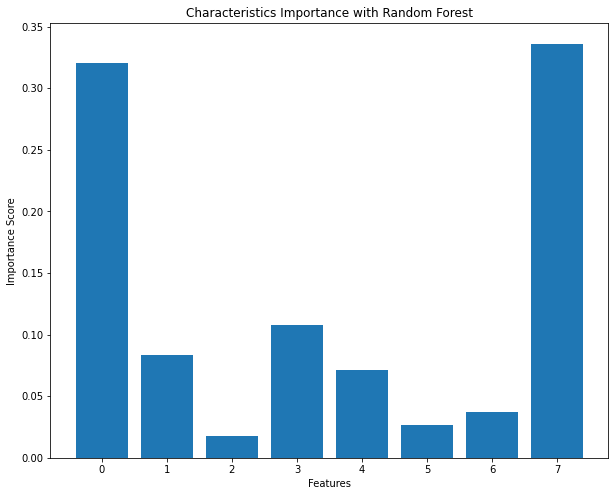

In [21]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X = df.iloc[:,:-1] 
y = df.iloc[:,-1] 
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,8),facecolor='w')
plt.title("Characteristics Importance with Random Forest Regressor")
plt.xlabel('Features')
plt.ylabel('Importance Score')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [63]:
corr=df.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000
